<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Frameworks/Pytorch/DNNs/Cross%20Entropy%20Loss/MNIST%20Data/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import keras
import torch

In [2]:
torch.manual_seed(0)

## Generate Dataset

In [3]:
(X_train, Y_train), (X_val, Y_val) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train,X_val = X_train.reshape(X_train.shape[0],28*28), X_val.reshape(X_val.shape[0],28*28)

In [5]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


## Using torch tensors and autograd

In [6]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))

In [7]:
print(X_train.shape, Y_train.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [8]:
torch.randn(2,784).shape

torch.Size([2, 784])

## Model Class

In [9]:
import torch.nn.functional as F

In [10]:
class Mnist:
  def __init__(self):
    torch.manual_seed(0)
    
    self.weights1 = torch.randn(784,2) / math.sqrt(2)
    self.weights1.requires_grad_()
    
    self.bias1 = torch.zeros(2, requires_grad=True)
    
    self.weights2 = torch.randn(2, 10) / math.sqrt(2)
    self.weights2.requires_grad_()
    
    self.bias2 = torch.zeros(10, requires_grad=True)

  def predict(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1 # (N, 784) x (784, 2) -> (N, 2)
    h1 = a1.sigmoid() # (N, 2)
    a2 = torch.matmul(h1, self.weights2) + self.bias2 # (N, 2) x (2, 10) -> (N, 10)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 10)
    return h2
  
  def accuracy(self, y_hat, y):
    pred_labels = torch.argmax(y_hat, dim=1)
    pred_binary = (pred_labels == y).float()
    average_acc = pred_binary.mean()
    return  average_acc

  def fit(self,X,Y,epochs = 1000, learning_rate = 1):
    loss_arr = []
    acc_arr  = []
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      
      loss = F.cross_entropy(Y_hat, Y)
      loss.backward()
      loss_arr.append(loss.item())
      
      if(epoch % 1000 == 999):
        print("\n\n=======================================\n")
        print("Epoch = ", epoch+1, " Loss = ",loss_arr[epoch])

      acc = self.accuracy(Y_hat, Y)
      acc_arr.append(acc.item())
      
      with torch.no_grad():
        self.weights1 -= self.weights1.grad * learning_rate
        self.bias1    -= self.bias1.grad    * learning_rate
        self.weights2 -= self.weights2.grad * learning_rate
        self.bias2    -= self.bias2.grad    * learning_rate
        
        self.weights1.grad.zero_()
        self.bias1.grad.zero_()
        self.weights2.grad.zero_()
        self.bias2.grad.zero_()
    
    plt.plot(loss_arr, 'r-')
    plt.plot(acc_arr, 'b-')
    plt.show()
    
    print('Loss before training', loss_arr[0])
    print('Loss after training', loss_arr[-1])
    return loss_arr, acc_arr





Epoch =  1000  Loss =  2.2041032314300537



Epoch =  2000  Loss =  2.161414384841919



Epoch =  3000  Loss =  2.1515207290649414



Epoch =  4000  Loss =  2.147263526916504



Epoch =  5000  Loss =  2.144928216934204



Epoch =  6000  Loss =  2.144090414047241



Epoch =  7000  Loss =  2.141995668411255



Epoch =  8000  Loss =  2.1410629749298096



Epoch =  9000  Loss =  2.1400563716888428



Epoch =  10000  Loss =  2.138585090637207


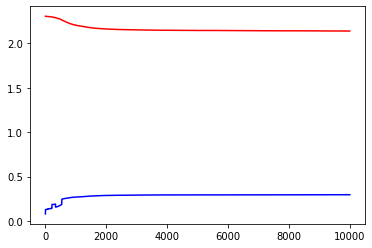

Loss before training 2.3048534393310547
Loss after training 2.138585090637207
CPU times: user 1h 13min 42s, sys: 6.58 s, total: 1h 13min 48s
Wall time: 1h 13min 59s


In [11]:
%%time
model = Mnist()
loss, acc = model.fit(X_train.float(),Y_train.long(),learning_rate = 0.5,epochs = 10000)

In [12]:
Y_pred = model.predict(X_val.float())
test_acc = model.accuracy(Y_pred,Y_val.long())

In [13]:
print("Training accuracy is : ", acc[-1])
print("Test accuracy is : ", test_acc.item())

Training accuracy is :  0.2967666685581207
Test accuracy is :  0.29750001430511475
